In [38]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df = ride_data_df.groupby("city")["fare"].agg(["sum", "count", "mean"])
ride_data_df.head()


,sum,count,mean
city,,,
Amandaburgh,443.55,18,24.641667
Barajasview,557.31,22,25.332273
Barronchester,582.76,16,36.422500
Bethanyland,593.21,18,32.956111
Bradshawfurt,400.64,10,40.064000


In [39]:
# Combine the data into a single dataset
# note: it matters which DF you pick first
pyber_merged_df = pd.merge(ride_data_df, city_data_df, on = 'city', how = 'left')

# Display the data table for preview
pyber_merged_df.head()

,city,sum,count,mean,driver_count,type
0,Amandaburgh,443.55,18,24.641667,12,Urban
1,Barajasview,557.31,22,25.332273,26,Urban
2,Barronchester,582.76,16,36.422500,11,Suburban
3,Bethanyland,593.21,18,32.956111,22,Suburban
4,Bradshawfurt,400.64,10,40.064000,7,Rural


## Bubble Plot of Ride Sharing Data

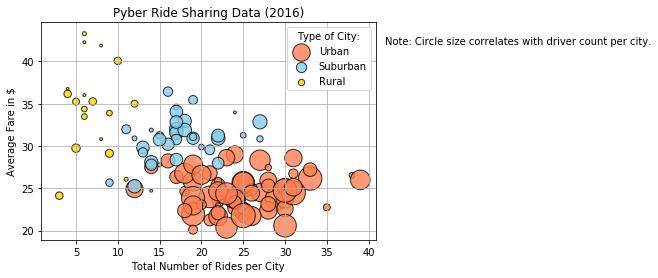

In [40]:
# Obtain the x and y coordinates for each of the three city types
urban = pyber_merged_df.loc[pyber_merged_df["type"] == "Urban"]
suburban = pyber_merged_df.loc[pyber_merged_df["type"] == "Suburban"]
rural = pyber_merged_df.loc[pyber_merged_df["type"] == "Rural"]

# Build the scatter plots for each city types
plt.scatter(urban["count"], urban["mean"], color = "coral", edgecolors = "black", s = urban["driver_count"]*8, label = "Urban", alpha = 0.8, linewidth = 1.0)
plt.scatter(suburban["count"], suburban["mean"], color = "skyblue", edgecolors = "black", s = suburban["driver_count"]*8, label = "Suburban", alpha = 0.8, linewidth = 1.0)
plt.scatter(rural["count"], rural["mean"], color = "gold", edgecolors = "black", s = rural["driver_count"]*8, label = "Rural", alpha = 0.8, linewidth = 1.0)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare in $")
plt.grid()

# Create a legend
plt.legend(title = "Type of City:", loc = "best")

# Incorporate a text label regarding circle size
plt.text(42,42,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Ride Share Analysis.png")

# Show plot
plt.show()

## Total Fares by City Type

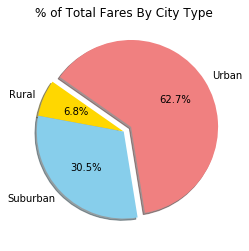

In [41]:
# Calculate Type Percents
fare_pie = pyber_merged_df.groupby("type")["sum"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fare_pie, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 145)
plt.title("% of Total Fares By City Type")

# Save Figure
plt.savefig("% of Total Fares By City Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

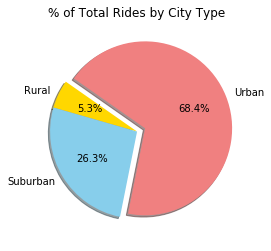

In [45]:
# Calculate Ride Percents
rides_pie = pyber_merged_df.groupby("type")["count"].sum()

# Build Pie Chart
labels2 = ["Rural","Suburban","Urban"]
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(rides_pie, explode = explode, labels = labels2, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 145)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig ("% of Total Rides by City Type.png")

# Show Figure
plt.show()


## Total Drivers by City Type

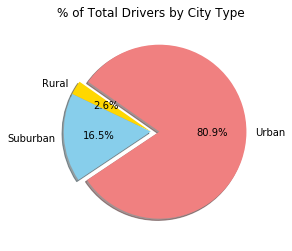

In [51]:
# Calculate Driver Percents
drivers_pie = pyber_merged_df.groupby("type")["driver_count"].sum()

# Build Pie Charts
labels3 = ["Rural","Suburban","Urban"]
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(drivers_pie, explode = explode, labels = labels3, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 145)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig ("% of Total Drivers by City Type.png")

# Show Figure
plt.show()